#  Load libraries

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importing the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/TENNIS-dataset_ID3_EXP8.csv")
value=['Outlook','Temprature','Humidity','Wind']
df

,outlook,temperature,humidity,wind,answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


# Data Analysis

In [4]:
len(df)           #Dataset Lenght

14

In [5]:
df.shape  #To see the number of rows and columns in our dataset:

(14, 5)

In [6]:
df.head()         #To inspect the first five records of the dataset:

,outlook,temperature,humidity,wind,answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes


In [7]:
df.tail()         #To inspect the last five records of the dataset:

,outlook,temperature,humidity,wind,answer
9,rain,mild,normal,weak,yes
10,sunny,mild,normal,strong,yes
11,overcast,mild,high,strong,yes
12,overcast,hot,normal,weak,yes
13,rain,mild,high,strong,no


In [8]:
df.describe()     #To see statistical details of the dataset:

,outlook,temperature,humidity,wind,answer
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,weak,yes
freq,5,6,7,8,9


# Preparing the Data (Data Slicing)

In [9]:
#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df

,outlook,temperature,humidity,wind,answer
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [10]:
# Putting feature variable to X
X = df.drop('answer',axis=1)

# Putting response variable to y
y = df['answer']                                #contains the label

In [11]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

# Training and Making Predictions

In [12]:
# perform training 
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or 

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [13]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)  

In [14]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


- Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [15]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
2,1,1
10,1,1
6,1,1
5,0,1
1,0,0


# Evaluating the Algorithm

In [16]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[1 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [17]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz


In [19]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\I324158\Anaconda3\Library\bin\graphviz'

# Visualizing Decision Trees

In [20]:
# !conda install graphviz


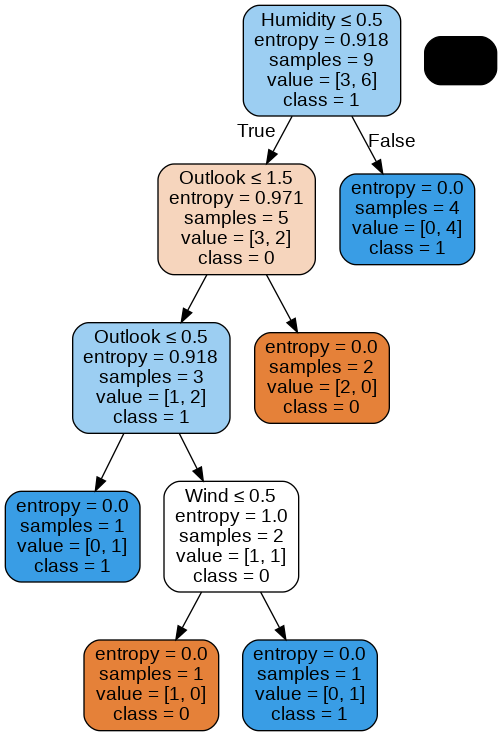

In [21]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())